In [1]:
#The trend is what is happening to the mean value in this time series.
#We do see variance of fluctuations if we take a closer unit of time.
#Generally its either increasing/decreasing/stationary.
#Seasonality - repeatitive trends
#Cyclical - trends with no set repetition

# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

The reason for covering this, is that we may find it very useful later on when discussing time series data (typical of quantitative financial analysis).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# You can safely ignore the warning:
# Please use the pandas.tseries module instead. from pandas.core import datetools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = sm.datasets.macrodata.load_pandas().data
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [7]:
#lets set the year as the index column using sm
#df.set_index('year')
pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [8]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [9]:
df.index = index

In [10]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0, 0.5, 'REAL GDP')

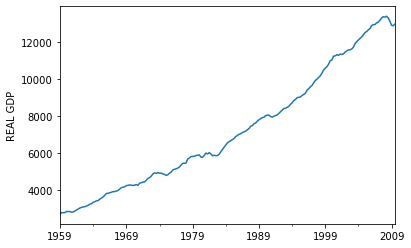

In [11]:
#let's do some analysis by plotting:
df['realgdp'].plot()
plt.ylabel("REAL GDP")

In [12]:
#lets now use sm to get the trend 
#we are going to use the Hodrick-Prescott filter

## Using Statsmodels to get the trend
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [13]:
# Tuple unpacking
result = sm.tsa.filters.hpfilter(df.realgdp)
#gives cycle : ndarray - The estimated cycle in the data given lamb.
#trend : ndarray -  The estimated trend in the data given lamb.

In [14]:
type(result)

tuple

In [15]:
result[0]
#its a series , there is no result[2]
#a tuple of 2 items

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [16]:
gdp_cycle, gdp_trend =  sm.tsa.filters.hpfilter(df['realgdp'])

In [17]:
df["trend"] = gdp_trend
#create new column

<AxesSubplot:>

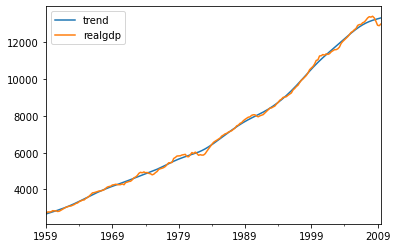

In [18]:
df[['trend','realgdp']].plot()

In [19]:
#the blue line is modeling the trend and the blue is the real gdp
#lets zoom in - fix the plot so we can see more clearly

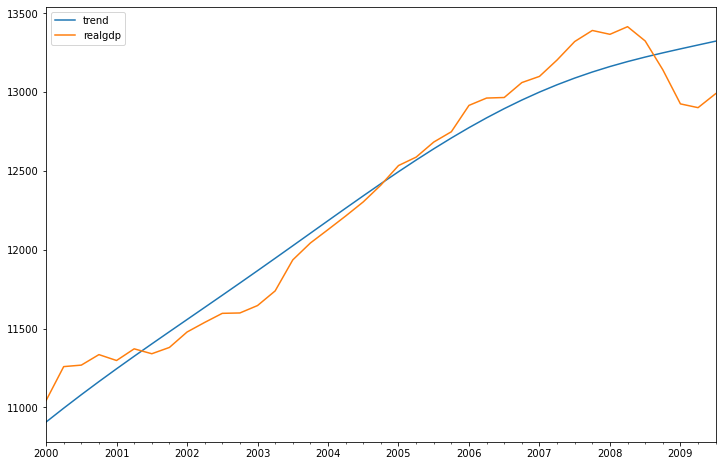

In [20]:
df[['trend','realgdp']]["2000-03-31":].plot(figsize=(12,8));

In [21]:
#sm has alot of statistical models and filters you can calculate them and use them with stats models

## 8.1 ETS - EWMA - SMA

In [22]:
#ETS Models (Error-Trend-Seasonality)
#    Exponential Smoothing
#    Trend Methods Models
#    ETS Decomposition

In [23]:
# EWMA models
#previously used rolling - Simple Moving Averages (MA)
#EWMA models - Exponentially Weighted Moving Averages
#SMA has weaknesses such as smaller windows = more noise than singal,
#Lags by the size of the actual window - missing data from first point
#Does not inform youa about possible future behaviour, all it does it describes your data.
#Therefore historical data might skew your SMA significantly
#To fix some of these issues we are going to use EWMA models

In [24]:
# EWMA models reduces the lag effect from SMA and puts more weight on values that occurred
#more recently by applying more weight to more recent values. The weight we apply depends on the 
#parameters used in the EWMA and the number of periods given in a window size.

In [25]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")
#(parse_dates = True) won't work because there are a couple of missing points inside that dataset

In [26]:
airline.index
#its a string index not a datetime index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)

In [27]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [28]:
airline.head()
#indicates that its a datetime index again

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [29]:
airline.index
#datetimeindex

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# SMA
## Simple Moving Average

We've already shown how to create a simple moving average, quick review:

In [30]:
airline['6-month-SMA']=airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()
#this is how you get the 6month SMA and the 12 motn SMA

In [31]:
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN


<AxesSubplot:xlabel='Month'>

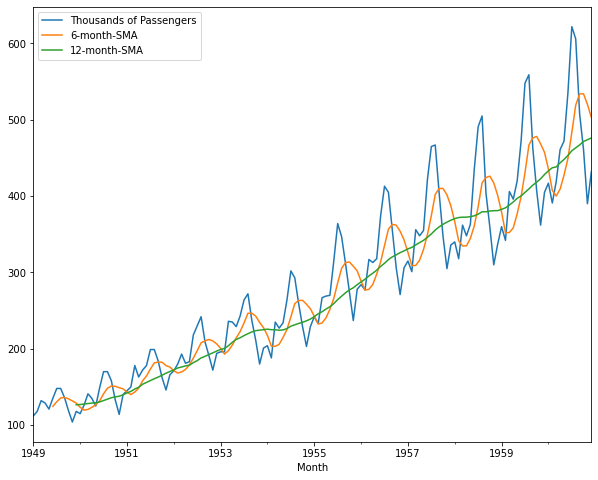

In [32]:
#Lets plot them now
#SMA
airline.plot(figsize = (10,8))

# EWMA
## Exponentially-weighted moving average 

We just showed how to calculate the SMA based on some window.However, basic SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

In [33]:
#EWA elliminates lag - at the begining there is lag - see orange and green lines
#smaller windows - more noise 
#never reaches the full peak value of the data due to averaging.
#recent points = more weight

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

Where x_t is the input value, w_i is the applied weight (Note how it can change from i=0 to t), and y_t is the output.

Now the question is, how to we define the weight term w_i ?

This depends on the adjust parameter you provide to the .ewm() method.

When adjust is True (default), weighted averages are calculated using weights:

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When adjust=False is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When adjust=True we have y0=x0 and from the last representation above we have yt=αxt+(1−α)yt−1, therefore there is an assumption that x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have 0<α≤1, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

https://www.investopedia.com/articles/07/ewma.asp

In [34]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
#yearly span - average
#ewm(span,com,halflife,alpha) - Decay terms

<AxesSubplot:xlabel='Month'>

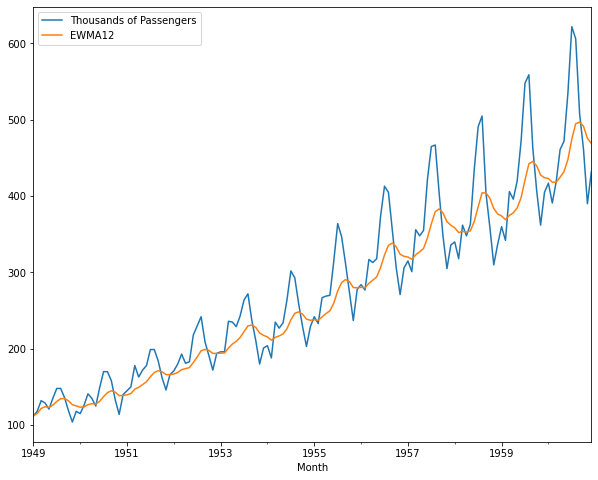

In [35]:
airline[['Thousands of Passengers','EWMA12']].plot(figsize = (10,8))

In [36]:
#the average and we get this exponentially weighted moving average.And you can see here each year is 
#kind of more and more strongly weighted as you get closer and closer to the end of the graph.

In [37]:
#If we look at this plot, we can see that the behavior at the beginning is different than the behavior
#at the end, you'll notice that this sort of seasonality trend is a lot more clear towards the end 
#pointsthan versus the beginning points. And that's because we've waited the points closer to the 
#present time, heavier than the points during the more historical values or the older values.

## ETS - Decomposition

In [38]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")

In [39]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<AxesSubplot:xlabel='Month'>

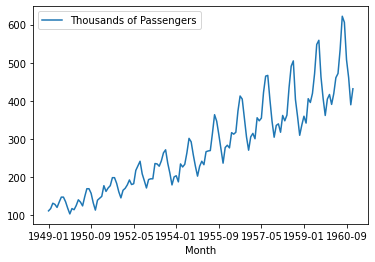

In [40]:
 airline.plot()   

In [41]:
#I can see that there's looks like there's some seasonality to it, and then there's also a general 
#trend in the opposite direction. So based off this chart, it looks like the trend in these 
#earlier days is slightly increasing at a higher rate than just linear. So what I'm trying to 
#figure out is, is this just a linear trend or maybe it's like an exponential trend. It's a little 
#hard to tell from this plot. So it would be nice is if we can use ETFs to decompose this that way,
#I can analyze just the trend itself and then analyze just the seasonal part itself.  

## ETS

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

Based off this chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

In [42]:
# Get data in correct format
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

In [43]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

<AxesSubplot:xlabel='Month'>

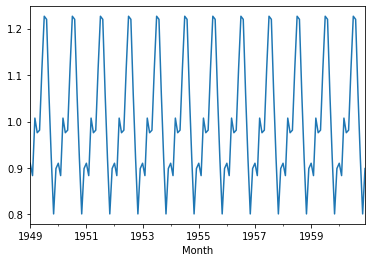

In [45]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

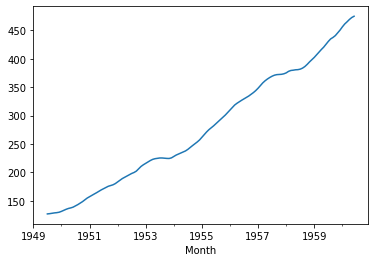

In [46]:
result.trend.plot()

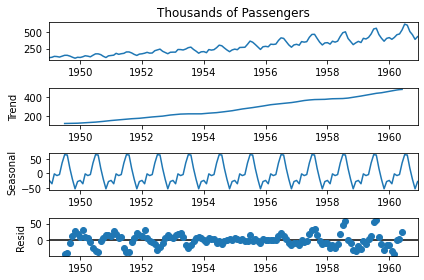

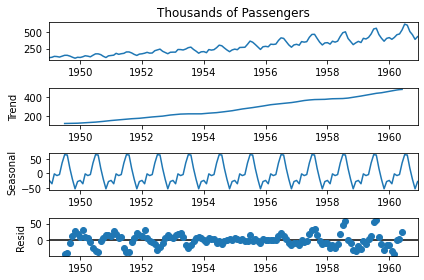

In [47]:
result2 = seasonal_decompose(airline['Thousands of Passengers'], model='additive')
result2.plot()

<AxesSubplot:xlabel='Month'>

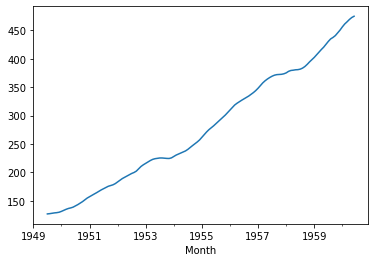

In [48]:
result2.trend.plot()

In [49]:
#multiplicative and additive is pretty much the same thing because its pretty much early
#doesn't make a different if we swithc model because its in the verge of both of them
#You could see it kind of either way, whether it's linear or some sort of a higher growth.
#In other cases, it's going to be a lot more obvious if it's kind of exponential growth or if 
#it's straight linear growth. Here it's almost in the middle between on both, really. Either one 
#would probably work fine. As you can see, we kind of got almost the exact same results 
#when we were plotting these out.

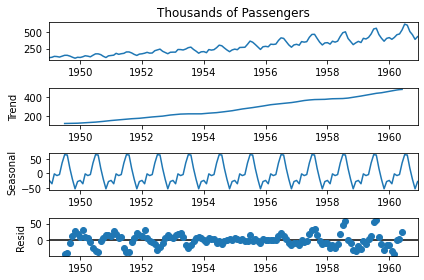

In [50]:
fig2 = result2.plot()

# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

2 types:
* Non-Seasonal Arima -non seasonal data
* Seasonal Arima -seasonal data

Let's go through these steps!

https://people.duke.edu/~rnau/411arim3.htm

In [51]:
#Areva, models are applied in some cases where data show evidence of non stationary, that is where
#an initial different step corresponding to the integrated part of the model can be applied one or 
#more times to eliminate this non stationary.
#major components of Arima:
#That is the auto regressive portion, the integrated portion, and that moving average portion.

# non seasonal Arima models
are generally denoted as Arima P, the Q, where the parameters P and Q and are non-negative integers.

AR (p): Autoregression:
○ A regression model that utilizes the dependent relationship between a current observation and observations over a previous period.

I (d): Integrated: 
○ Differencing of observations (subtracting an observation from an observation at the previous time 
step) in order to make the time series stationary.

MA (q): Moving Average:
○ A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

● Stationary vs Non-Stationary Data:

* A Stationary series has constant mean and variance over time.
* A Stationary data set will allow our model to predict that the mean and variance will be the same in future periods.
*  Mean needs to be constant at Stationary
*  Variance should not be a function of time
*  Covariance should not be a function of time

● There are also mathematical tests you can use to test for stationarity in your data.

● A common one is the Augmented Dickey–Fuller test (we will see how to use this with Python’s statsmodels)

If you’ve determined your data is not stationary (either visually or mathematically), you will then need to transform it to be stationary in order to evaluate it and what type of ARIMA terms you will use.
One simple way to do this is through “differencing”

Basically, you take the value at time equals T and subtract it at the value of T minus one. And that's your first difference. If you take a first difference and your data is not yet stationary, after you either check it visually or do a mathematical test on it, we you can do is then take the second difference and second difference. Same idea, except now we're starting at nine point three and doing the same subtraction.Just keep in mind that if you keep taking more and more differences, you end up sacrificing a row of data for every difference that you take.

## Autocorrelation Plots

An autocorrelation plot (also known as a Correlogram ) shows the correlation of the series with itself, lagged by x time units.
So the y axis is the correlation and the x axis is the number of time units of lag.

Gradual Decline

Sharp Drop-off



Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use.

In general you would use either AR or MA, using both is less common.

When actually applying the AR and MA terms, you will set values of p or q

 If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

This will allow you to decide what actual values of p,d, and q to provide your ARIMA model.

● p: The number of lag observations included in the model.

● d: The number of times that the raw observations are differenced

● q: The size of the moving average window, also called the order of moving average.


# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

Summary of rules for identifying ARIMA models

https://people.duke.edu/~rnau/arimrule.htm

In [52]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [53]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [54]:
df.tail()
#notice the Nan value at the end

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [55]:
#lets fix the 2nd column's name
df.columns = ['Month','Milk in pounds per cow']
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [56]:
# Weird last value at bottom causing issues
df.drop(168,axis=0,inplace=True)

In [57]:
df['Month'] = pd.to_datetime(df['Month'])
#set the month column datetime format

In [58]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [59]:
df.set_index('Month',inplace=True)

In [60]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [61]:
df.describe()

,Milk in pounds per cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [62]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


## Step 2: Visualize the Data

Let's visualize this data with a few methods.

<AxesSubplot:xlabel='Month'>

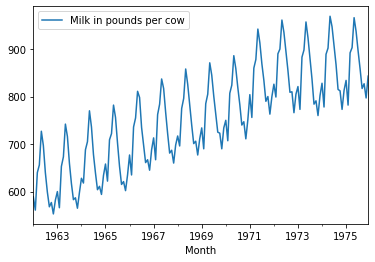

In [63]:
df.plot()

In [64]:
timeseries = df['Milk in pounds per cow']

In [65]:
type(timeseries)

pandas.core.series.Series

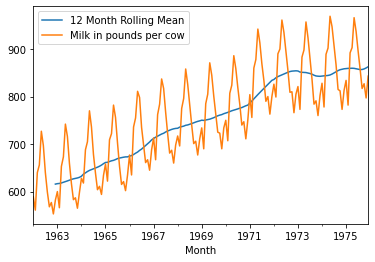

In [66]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

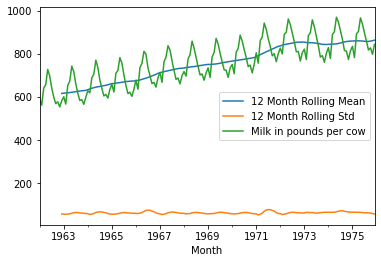

In [67]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

In [68]:
#upward trend in the graph

In [69]:

#lets check the ETS decomposition plot - Error Trend Seasonality decomposition
#it mathematically seperates out the trend component, the seasonality component and then the 
#residual which is the error that's not explained by seasonality or trend.


In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
decomp = seasonal_decompose(timeseries,freq=12)
#freq = 12 not needed as we are using yearly data

<ipython-input-71-330f0aad90ff>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = seasonal_decompose(timeseries,freq=12)


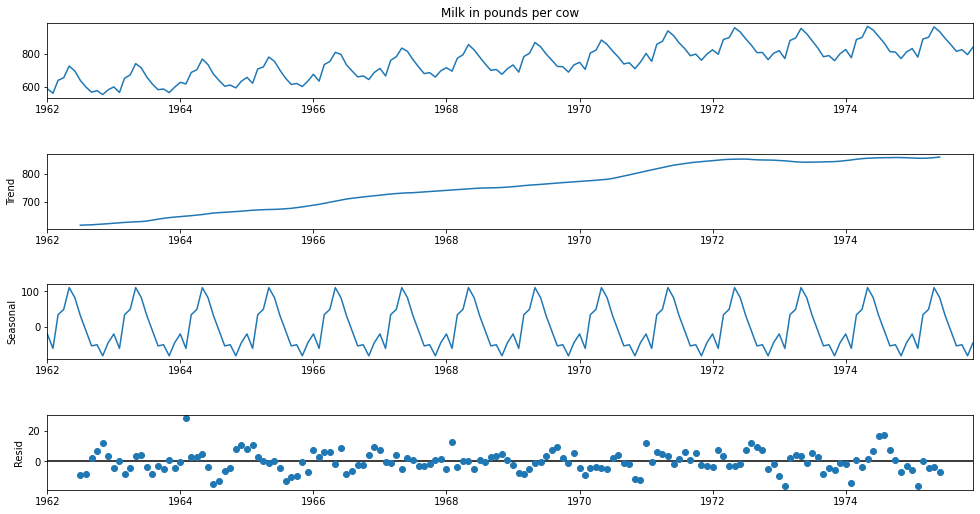

In [72]:
fig3 = decomp.plot()
fig3.set_size_inches(15,8)
#Observed values
#trend
#seasonal
#residual

## Decomposition

ETS decomposition allows us to see the individual parts!

<ipython-input-73-43f987f38431>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)


<Figure size 432x288 with 0 Axes>

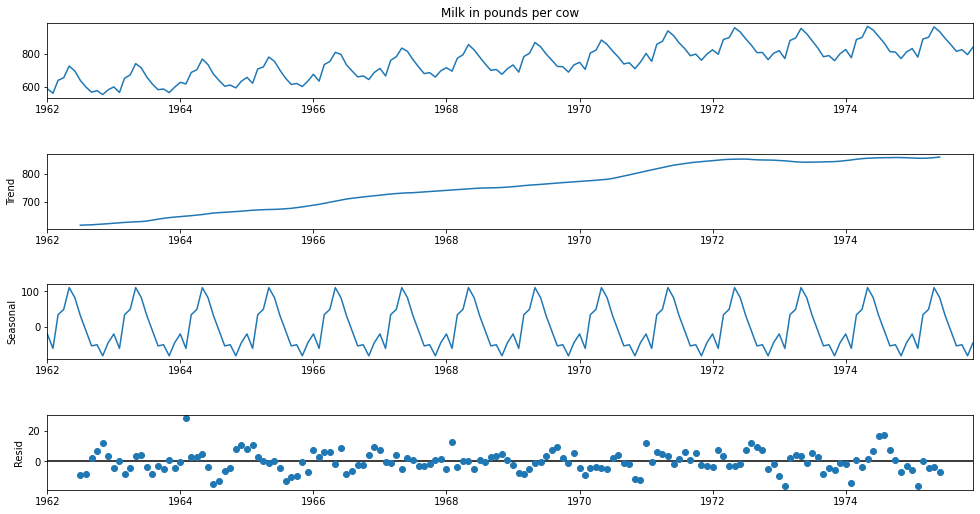

In [73]:


decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

## Arima Part 2
We finished visualising the data and also did an ETS decomposition on the data.

Now lets test if the data is stationary or not. But its pretty obvious just from viewing the data, but let's test this mathematically using statsmodels.

## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. Remember that our null hyptothesis here is that the timeseries is non stationary.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis. Never use the word accept the null hypthesis. You just fail to accept it because you don't really know if the null hypothesis is 100% you just don't have enough evidence here that will allow you to reject it completely.

Let's run the Augmented Dickey-Fuller test on our data:

In [74]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
result = adfuller(df['Milk in pounds per cow'])
#call adfuller on our actually timeseries in this case milk in pounds per cow
#returns this adf float test statistic, returns the p value, the number of lags used, number of observations, critical 
#values etc.

In [77]:
result
#its a messy tuple! lets format this!

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [78]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221294
p-value : 0.6274267086030316
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [79]:
#store it into a function
def adf_check(time_series):
    
#this will allow us to repeatedly do an ATF check in case we need to do it later on
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
#labels correspond to what that result has in its order (in the tuple)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 
#lets print them out now  - zip together the result tuple with the labels list 
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

#to reject the null hypothesis
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
        print("Reject null hypothesis. ")
        print("Data has no unit root and is stationary. ")
    else:
#fail to reject the null hypothesis
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary. ")
        print("Fail to reject null hypothesis. ")
        print("Data has a unit root it is non stationary. ")

In [80]:
adf_check(df['Milk in pounds per cow'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221294
p-value : 0.6274267086030316
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary. 
Fail to reject null hypothesis. 
Data has a unit root it is non stationary. 


We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on it. We will take this into account when differencing our data! Typically financial stock data won't be seasonal, but that is kind of the point of this section, to show you common methods, that won't work well on stock finance data! 

Since its not stationary we are going be doing differencing!

## Differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

** First Difference **

In [81]:
#lets make a new column named milk first different. We subtract milk in pounds per cow with the shifted version of (1)
#shifted over one time step.
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [82]:
#we need to drop the missing NAN values, we are missing the first value and this messes the adf function
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530704
p-value : 0.030068004001785647
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.
Reject null hypothesis. 
Data has no unit root and is stationary. 


In [83]:
#p-value : 0.030068004001785647
#Data has no unit root and is stationary. 


<AxesSubplot:xlabel='Month'>

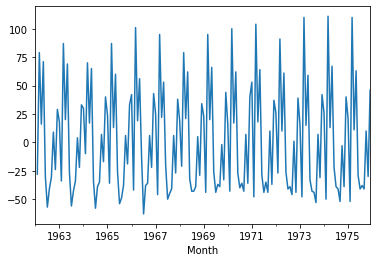

In [84]:
#this is the first difference and variance looks pretty average.
df['Milk First Difference'].plot()

In [85]:
#lets do a second difference!
# Sometimes it would be necessary to do a second difference 
# This is just for show, we didn't need to do a second difference in our case
df['Milk Second Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(1)

In [86]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.327873645603301
p-value : 1.1126989332084581e-26
#Lags Used : 11
Number of Observations Used : 154
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.
Reject null hypothesis. 
Data has no unit root and is stationary. 


<AxesSubplot:xlabel='Month'>

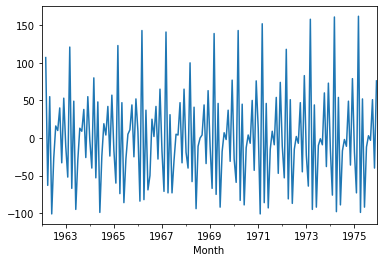

In [87]:
#it looks almost the same on the 2nd difference so its really the first difference that did most of the elimination of the trend
df['Milk Second Difference'].plot()

** Seasonal Difference **

<AxesSubplot:xlabel='Month'>

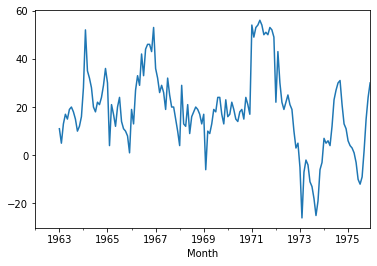

In [88]:
#because we have seasonal data so we can also do seasonal difference
#shift it over by an entire season - by 12 months 
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)
df['Seasonal Difference'].plot()
#this may or may not be enough to pass our test so lets check it out with our function!

In [89]:
# Seasonal Difference by itself was not enough!
adf_check(df['Seasonal Difference'].dropna())
#0.1607988052771135
#data has a unit root it is non stationary.

#this is actually not enough, this is still considered a non stationary data set and you can see that its definately not 
#stationary because it looks like as you get further in time the variance begins to increase (from the above graph).
#we can see it visually

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359398
p-value : 0.1607988052771135
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary. 
Fail to reject null hypothesis. 
Data has a unit root it is non stationary. 


** Seasonal First Difference **

In [90]:
df.head()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference
Month,,,,
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN
1962-04-01,656.0,16.0,-63.0,NaN
1962-05-01,727.0,71.0,55.0,NaN


<AxesSubplot:xlabel='Month'>

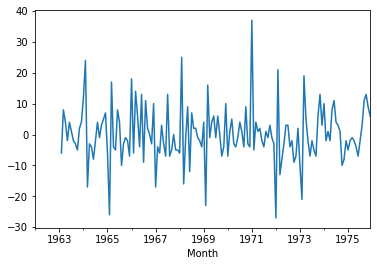

In [95]:
# You can also do seasonal first difference
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)
df['Seasonal First Difference'].plot()
#looks pretty stationary but lets confirm

In [97]:
adf_check(df['Seasonal First Difference'].dropna())
#p-value : 1.8654234318788342e-05  - very low p value
#strong evidence against the null hypothesis,
#Reject null hypothesis. 
#Data has no unit root and is stationary. 

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921984
p-value : 1.8654234318788342e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.
Reject null hypothesis. 
Data has no unit root and is stationary. 


# Autocorrelation and Partial Autocorrelation Plots

An autocorrelation plot (also known as a [Correlogram](https://en.wikipedia.org/wiki/Correlogram) ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

So imagine taking your time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now you have two series of length T−1 for which you calculate a correlation coefficient. This is the value of of the vertical axis at x=1x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF [here](http://people.duke.edu/~rnau/arimrule.htm) and [here](https://people.duke.edu/~rnau/411arim3.htm).

### Autocorrelation Interpretation

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [99]:
df

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN
...,...,...,...,...,...
1975-08-01,858.0,-38.0,3.0,-9.0,3.0
1975-09-01,817.0,-41.0,-3.0,2.0,11.0
1975-10-01,827.0,10.0,51.0,15.0,13.0


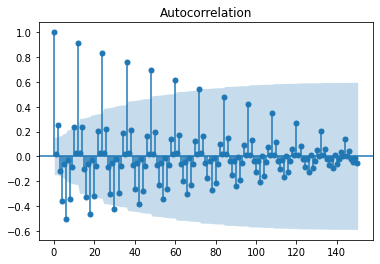

In [107]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first = plot_acf(df["Milk First Difference"].dropna(), lags =150)

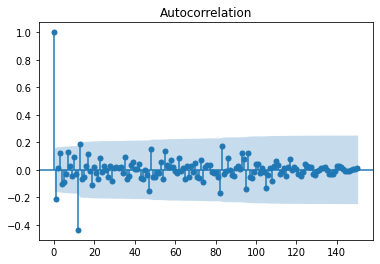

In [109]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna(), lags=150)
#we get the autocorrelation - we have a sudden drop off.

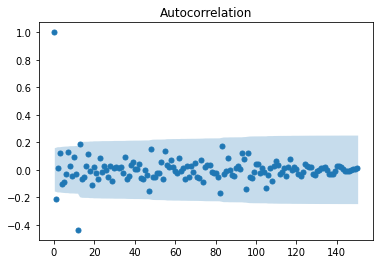

In [112]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna(), lags=150, use_vlines=False)
#we get the autocorrelation - we have a sudden drop off.

Pandas also has this functionality built in, but only for ACF, not PACF. So I recommend using statsmodels, as ACF and PACF is more core to its functionality than it is to pandas' functionality.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

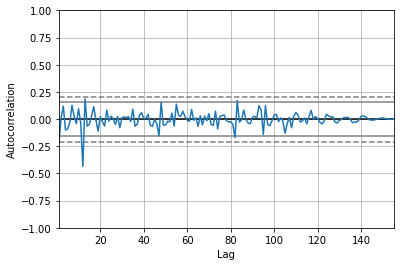

In [110]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

## Partial Autocorrelation

In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables.  The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.

Formally, this is relationship is defined as:

## $\frac{\text{Covariance}(y, x_3|x_1, x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3| x_1, x_2)}}$

Check out this [link](http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm) for full details on this.

We can then plot this relationship:

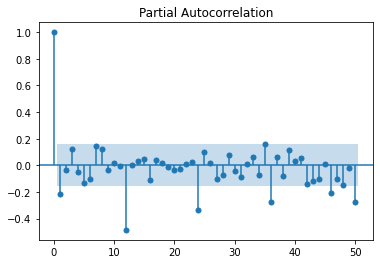

In [121]:
result = plot_pacf(df["Seasonal First Difference"].dropna(), lags=50)

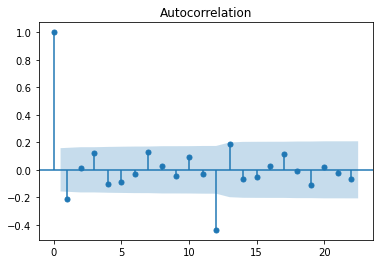

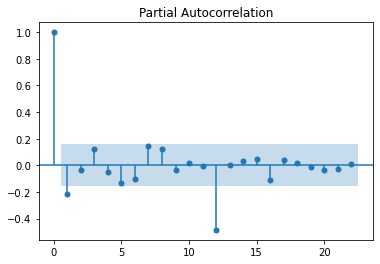

In [122]:
result = plot_acf(df["Seasonal First Difference"].dropna())
result = plot_pacf(df["Seasonal First Difference"].dropna())

### Interpretation

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

_____
### Final ACF and PACF Plots

We've run quite a few plots, so let's just quickly get our "final" ACF and PACF plots. These are the ones we will be referencing in the rest of the notebook below.
_____

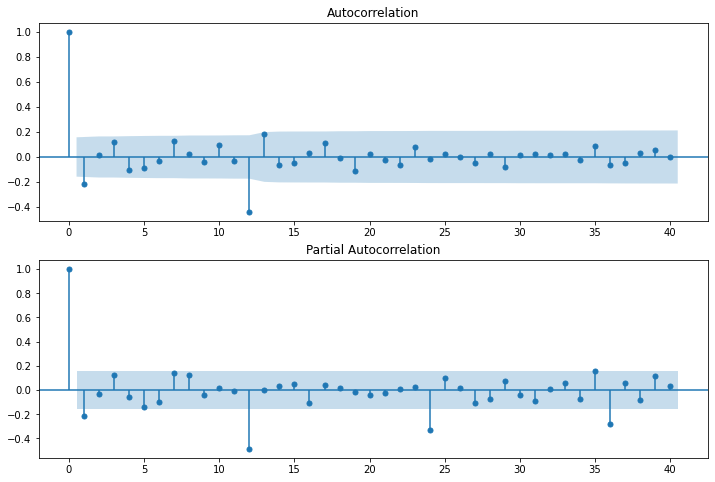

In [123]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

## Using the Seasonal ARIMA model

Finally we can use our ARIMA model now that we have an understanding of our data!

In [124]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [126]:
#very helpful
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

### p,d,q parameters

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [127]:
# We have seasonal data! so lets use the seasonal ARIMA model.
# s = seasonal , arima = auto regressive integrated moving average , x = exogenous variables(allows you to use extrernal data) 
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
#you need to call it fit 
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Mon, 25 Oct 2021   AIC                           1074.131
Time:                                      17:01:01   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [128]:
#to check the residual values
results.resid
#it has the error based off what it would predict for all our original data.

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641352
1975-09-01      8.158629
1975-10-01      7.676815
1975-11-01      6.572470
1975-12-01      5.936378
Length: 168, dtype: float64

<AxesSubplot:xlabel='Month'>

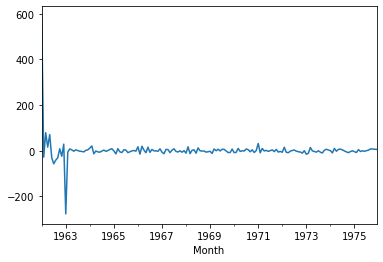

In [129]:
results.resid.plot()
#big error at 1963 but after that it pretty much smooths out.

<AxesSubplot:ylabel='Density'>

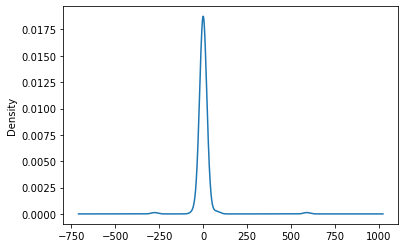

In [131]:
#lets plot the Kernel density estimation so we the kind of distribution of our errors
#most are around 0 which is good for us. - the closer to 0 the better
results.resid.plot(kind='kde')

## Prediction of Future Values

Firts we can get an idea of how well our model performs by just predicting for values that we actually already know:

In [134]:
df.columns

Index(['Milk in pounds per cow', 'Milk First Difference',
       'Milk Second Difference', 'Seasonal Difference',
       'Seasonal First Difference'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

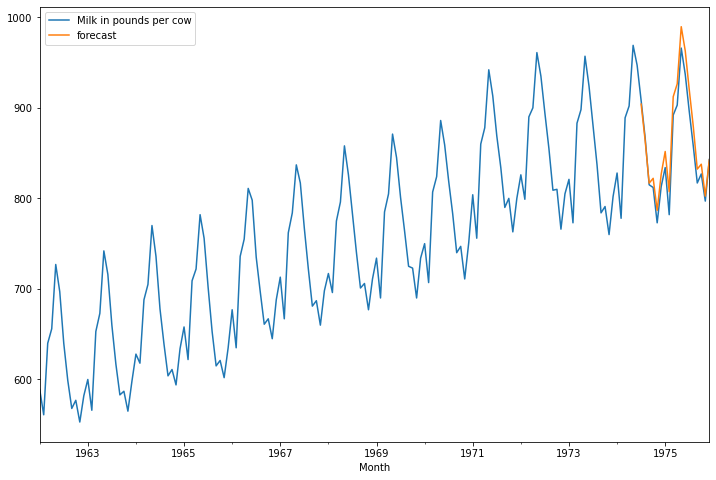

In [136]:
df['forecast'] = results.predict(start = 150, end= 168, dynamic= True)  
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8))
#this shows us what the ARIMA model has forecasted and we can see how it compares with our real data(orange)
#to be honest its a pretty good forecast!
#we tend to get off in some seasons but the trend seems to be correct and the general seasonality of this seems to be correct.

### Forecasting
This requires more time periods, so let's create them with pandas onto our original dataframe!

In [137]:
#up to now we are doing pretty good with the data that we already know so lets try to forcast for future data!
#to do this we need to increase the end =  168 to 250 lets say on the above line but to do this we need to add data.
#we wil use pandas for this!

In [139]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,879.668973
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,832.328552
1975-10-01,827.0,10.0,51.0,15.0,13.0,837.722248
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,802.452734
1975-12-01,843.0,46.0,76.0,30.0,6.0,842.499868


In [142]:
# first column - milk inpounds per cow is the real value, the last column is the forecasted value
#the residual values are the real values minus the forecasted value.

#what we are going to do now is add on some more months to this dataset with empty values 
#and then once these index positions are there, even though if all these values are empty we can still forecast on them.

In [140]:
# https://pandas.pydata.org/pandas-docs/stable/timeseries.html
# Alternatives 
# pd.date_range(df.index[-1],periods=12,freq='M')

In [144]:
#so what we need to do here is actually create an additional number of rows with timestamps , 
#with a datetime index which is going to represent future dates. 
#starting from 1975 december first. lets add 2 years to predict them.

In [141]:
from pandas.tseries.offsets import DateOffset

In [149]:
#list comprehension 
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24) ]
#df.index[-1] = is the last index value 1975 december first
#DateOffset(months=x) we add 24 new months
#we dont start from 0 because we dont want a duplicate december first 1975

In [150]:
future_dates
#a list of timestamps

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [151]:
#create a dataframe where the index is equal to the future dates and the columns are equal to the columns 
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [152]:
future_dates_df

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
final_df = pd.concat([df,future_dates_df])

In [155]:
final_df

,Milk in pounds per cow,Milk First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

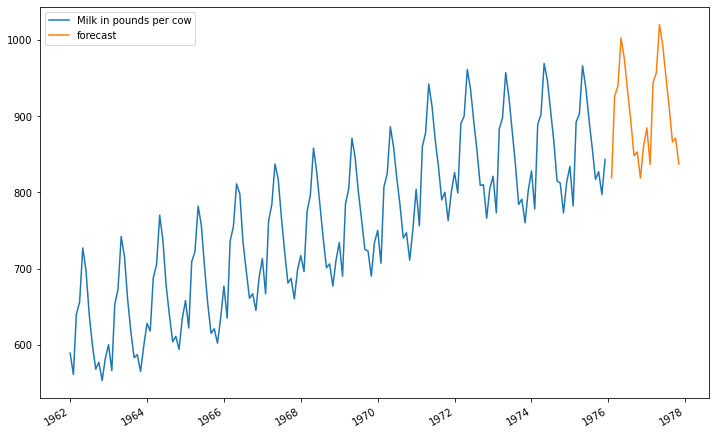

In [156]:
final_df['forecast'] = results.predict(start = 168, end = 192, dynamic= True)  #168->192  : 24 points ahead
final_df[['Milk in pounds per cow', 'forecast']].plot(figsize=(12, 8)) 

In [157]:
#we were able to create a realistic looking forecast - future prediction

## Why ARIMA models aren't always so great when you are dealing with financial data:

So a lot of this stuff assumes that the Y value is directly connected to the time and that the time is a really important aspect, the Y value.


Now, while that is true for a lot of financial data, that doesn't really take into account things like forces outside of the market, such as external traders being able to also buy and sell stock and affect its price.

And because of that, often you'll hear stock and securities prices are following some sort of Brownian motion, almost like a random walk. So they go up and down all the time. When you zoom in really close, it almost looks random, which is why I will also cover Monte Carlo simulations because of those aspects of financial data and securities data.

This sort of forecasting method doesn't really work with stock data in general, which is kind of inconvenient because you can see here it performs really well, this sort of data where your time has a clear relationship with your Y value.

But for stock market data, it doesn't really work that way. So that's why we can't really use a lot of these techniques with financial data.

Full Book Chapter on this:

https://people.duke.edu/~rnau/arimrule.htm

Nice example:

https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima

Not bad! Pretty cool in fact! I hope this helped you see the potential for ARIMA models, unfortunately a lot of financial data won't follow this sort of behaviour, in fact it will often follow something indicating brownian motion, what is that you ask? Well head on over to the next video section and we'll find out!

# Great Job!